# KNN intuition

KNN (k nearest neighbors) is one of the simplest machine learning algorithms that exist. It is used for regression and for classification and when we give them a point to make a prediction, it just check the k nearest neighbors (geometrically) and let them decide democratically, let's take a look.

In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
class KNN:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def _distance(self, x1, x2):
        if self.distance == 'euclidean':
            return np.sqrt(np.sum((x1 - x2)**2))
        elif self.distance == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance == 'minkowski':
            return np.sum(np.abs(x1 - x2) ** 3) ** (1/3)
        elif self.distance == 'hamming':
            return np.mean(x1 != x2)
    def _get_neighbors(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return k_nearest_labels
    def predict_classification(self, X):
        y_pred = [Counter(self._get_neighbors(x)).most_common(1)[0][0] for x in X]
        return y_pred
    def predict_regression(self, X):
        y_pred = [np.mean(self._get_neighbors(x)) for x in X]
        return y_pred
    def detect_outliers(self, X):
        distances = [min([self._distance(x, x_train) for x_train in self.X_train]) for x in X]
        mean_distance = np.mean(distances)
        std_distance = np.std(distances)
        threshold = mean_distance + 2 * std_distance
        outliers_indices = [i for i, distance in enumerate(distances) if distance > threshold]
        return outliers_indices

In [4]:
# Datos de ejemplo
X_train = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
y_train = np.array([0, 0, 1, 1, 0, 1])
X_test = np.array([[1, 3], [8, 9], [0, 0]])

In [5]:
# El modelo KNN y "entreno"
model = KNN(k=3, distance='euclidean')
model.fit(X_train, y_train)

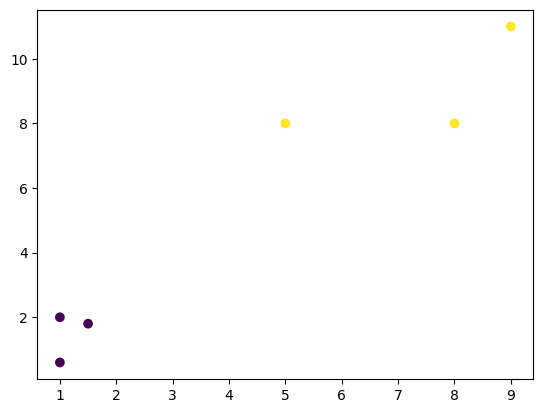

In [6]:
# Graficar datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Datos de entrenamiento')

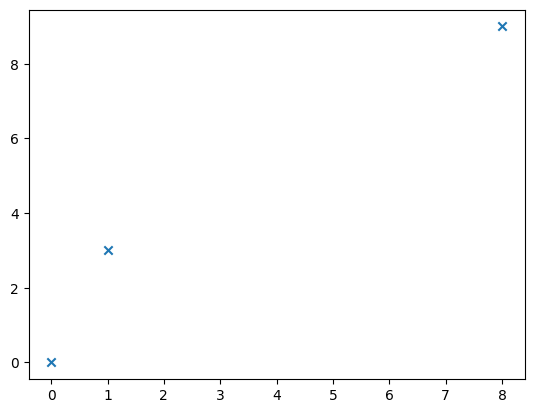

In [7]:
# Graficar datos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', label='Datos de prueba')

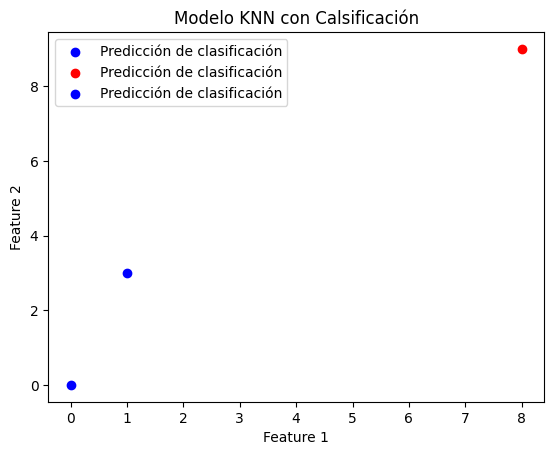

In [24]:
# Graficar predicciones de clasificación
predictions_classification = model.predict_classification(X_test)
for i, prediction in enumerate(predictions_classification):
    plt.scatter(X_test[i, 0], X_test[i, 1], marker='o', color='r' if prediction == 1 else 'b', label='Predicción de clasificación')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Modelo KNN con Calsificación')
plt.legend()
plt.show()

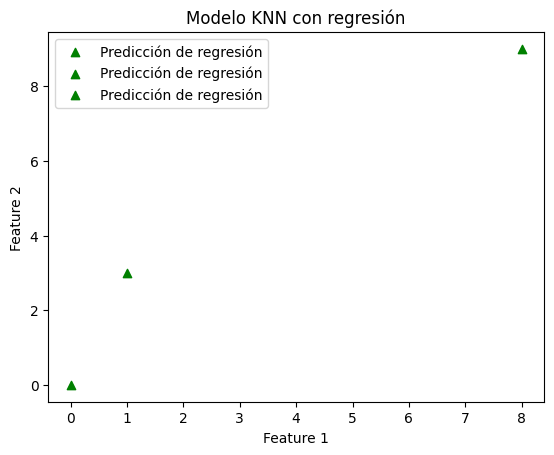

In [23]:
# Graficar predicciones de regresión
predictions_regression = model.predict_regression(X_test)
for i, prediction in enumerate(predictions_regression):
    plt.scatter(X_test[i, 0], X_test[i, 1], marker='^', color='g', label='Predicción de regresión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Modelo KNN con regresión')
plt.legend()
plt.show()

Usando sklearn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from jupyterthemes import jtplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [11]:
# Datos de ejemplo
X_train = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
y_train_classification = np.array([0, 0, 1, 1, 0, 1])
y_train_regression = np.array([2, 3, 8, 10, 1, 12])
X_test = np.array([[1, 3], [8, 9], [0, 0]])

In [12]:
# Creación y entreno del modelo KNN para clasificación
model_classification = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_classification.fit(X_train, y_train_classification)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [13]:
# Creación y entreno del modelo KNN para regresión
model_regression = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
model_regression.fit(X_train, y_train_regression)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

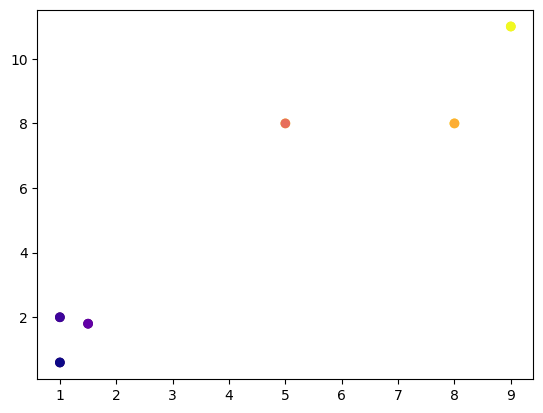

In [19]:
# Graficar datos de "entreno"
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_classification, cmap='viridis', label='Datos de entrenamiento (clasificación)')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_regression, cmap='plasma', label='Datos de entrenamiento (regresión)')

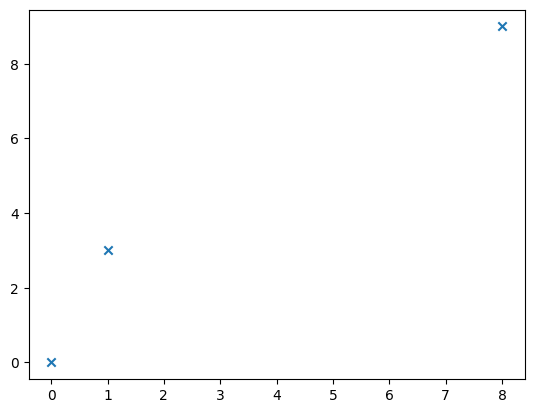

In [15]:
# Graficar datos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', label='Datos de prueba')

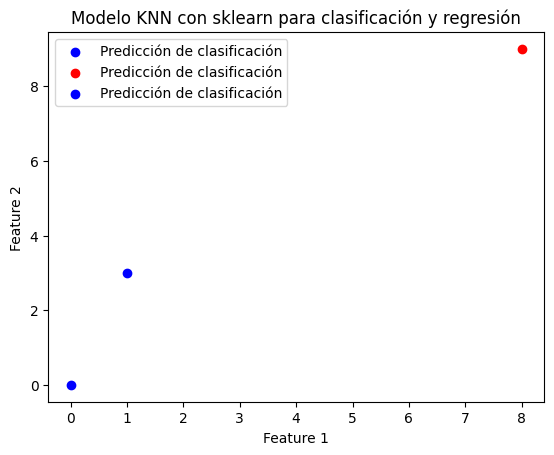

In [20]:
# Graficar predicciones de clasificación
predictions_classification = model_classification.predict(X_test)
for i, prediction in enumerate(predictions_classification):
    plt.scatter(X_test[i, 0], X_test[i, 1], marker='o', color='r' if prediction == 1 else 'b', label='Predicción de clasificación')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Modelo KNN con sklearn para clasificación')
plt.legend()
plt.show()    

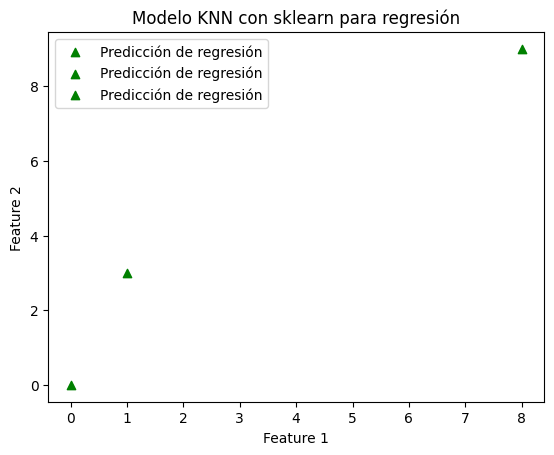

In [22]:
# Graficar predicciones de regresión
predictions_regression = model_regression.predict(X_test)
for i, prediction in enumerate(predictions_regression):
    plt.scatter(X_test[i, 0], X_test[i, 1], marker='^', color='g', label='Predicción de regresión') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Modelo KNN con sklearn para regresión')
plt.legend()
plt.show()    